In [1]:
import pandas as pd
import numpy as np
import os, pickle
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime, time

In [2]:
#list all files in data folder
files = os.listdir('dataset ')

In [4]:
files[0].replace(".csv","")
#load files[0] in a dataframe
df = pd.read_csv('dataset /'+files[0], low_memory=False)

In [5]:
datas={}
for file in files:
    if file != '.ipynb_checkpoints':
        datas[file.replace(".csv","")]=pd.read_csv('dataset /'+file, low_memory=False)

## Data Preprocessing

In [7]:
datas['legs']['dateonly']=datas['legs']['start_date'].apply(lambda x: x.split(' ')[0])

In [8]:
datas['legs']['campaign'].unique()

array(['AAA', 'BEL', 'HRV', 'FIN', 'FRA', 'ITA', 'NOR', 'PRT', 'SVK',
       'ESP', 'CHE'], dtype=object)

In [9]:
def extract_time_from_string(string):
    match = re.search(r'\d{2}:\d{2}:\d{2}', string)
    if match:
        return match.group()
    else:
        return None

In [10]:
datas['legs']['start_time']=datas['legs']['start_date'].apply(extract_time_from_string)

In [11]:
def convert_in_seconds(string): 
    numbers = re.findall(r'\d+', string)  # Find all numeric substrings
    total_sum = 3600 * int(numbers[0]) + 60 * int(numbers[1]) + int(numbers[2])
    return total_sum

In [12]:
datas['legs']['time_in_seconds']=datas['legs']['start_time'].apply(convert_in_seconds)

In [13]:
datas['legs']

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,worthwhileness_rating,transport_category,campaign,weekday,weekday_class,dateonly,start_time,time_in_seconds
0,#24:3498,Leg,o3QNooVleBR9WfbIaCqsaj3DlDl2,#32:1461,7,2019-05-06 16:26:16.773,2019-05-06 16:38:30.295,497.0,218.0,0.0,5.0,walking,AAA,Monday,Working_day,2019-05-06,16:26:16,59176
1,#25:3400,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#31:1449,7,2019-05-07 14:31:11.110,2019-05-07 14:36:22.474,0.0,385.0,0.0,4.0,walking,BEL,Tuesday,Working_day,2019-05-07,14:31:11,52271
2,#25:3460,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#30:1498,7,2019-05-07 15:40:10.952,2019-05-07 15:43:29.090,37.0,37.0,0.0,3.0,walking,BEL,Tuesday,Working_day,2019-05-07,15:40:10,56410
3,#24:3479,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:1435,1,2019-05-07 15:54:37.610,2019-05-07 16:00:42.174,0.0,580.0,0.0,3.0,cycling_emerging_micromobility,BEL,Tuesday,Working_day,2019-05-07,15:54:37,57277
4,#23:5342,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:2147,9,2019-05-21 04:45:12.391,2019-05-21 04:47:30.021,658.0,658.0,0.0,5.0,private_motorized,BEL,Tuesday,Working_day,2019-05-21,04:45:12,17112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158892,#222:47082,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:04:33.538,2019-11-28 12:10:38.924,206.0,206.0,365.0,-1.0,walking,CHE,Thursday,Working_day,2019-11-28,12:04:33,43473
158893,#223:47077,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,9,2019-11-28 12:10:38.924,2019-11-28 12:25:37.025,4957.0,4957.0,0.0,3.0,private_motorized,CHE,Thursday,Working_day,2019-11-28,12:10:38,43838
158894,#224:47071,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:25:37.025,2019-11-28 12:27:53.168,364.0,364.0,0.0,-1.0,walking,CHE,Thursday,Working_day,2019-11-28,12:25:37,44737
158895,#224:47070,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#130:20811,7,2019-11-28 16:36:57.975,2019-11-28 16:38:29.151,78.0,78.0,0.0,-1.0,walking,CHE,Thursday,Working_day,2019-11-28,16:36:57,59817


In [14]:
def assign_time_period(time):
    if time  >= 18001 and time <= 28800 : #from 5 to 8 AM
        return 'Early Morning'
    elif time >= 28801 and time <= 39600 : #from 8 to 11 AM 
        return 'Morning'
    elif time >= 39601 and time <= 50400 : #from 11 AM to 2 PM
        return 'Lunch'
    elif time >= 50401 and time <= 57600 : #from 2 to 4 PM
        return 'Early Afternoon'
    elif time >= 57601 and time <= 64800 : #from 4 to 6 PM
        return 'Afternoon'
    elif time >=  64801 and time <= 72000 : #from 6 to 8 PM
        return 'Early Evening'
    elif time >= 72001 and time <= 79200 : #from 8 to 10 PM
        return 'Evening'
    elif time >= 79200 and time <= 0 : #from 10 PM to 00
        return 'Late Evening'
    elif time >= 1 and time <= 18000 :
        return 'Night'
    else:
        return None

In [15]:
datas['legs']['TimePeriod'] = datas['legs']['time_in_seconds'].apply(assign_time_period)
datas['legs']

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,worthwhileness_rating,transport_category,campaign,weekday,weekday_class,dateonly,start_time,time_in_seconds,TimePeriod
0,#24:3498,Leg,o3QNooVleBR9WfbIaCqsaj3DlDl2,#32:1461,7,2019-05-06 16:26:16.773,2019-05-06 16:38:30.295,497.0,218.0,0.0,5.0,walking,AAA,Monday,Working_day,2019-05-06,16:26:16,59176,Afternoon
1,#25:3400,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#31:1449,7,2019-05-07 14:31:11.110,2019-05-07 14:36:22.474,0.0,385.0,0.0,4.0,walking,BEL,Tuesday,Working_day,2019-05-07,14:31:11,52271,Early Afternoon
2,#25:3460,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#30:1498,7,2019-05-07 15:40:10.952,2019-05-07 15:43:29.090,37.0,37.0,0.0,3.0,walking,BEL,Tuesday,Working_day,2019-05-07,15:40:10,56410,Early Afternoon
3,#24:3479,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:1435,1,2019-05-07 15:54:37.610,2019-05-07 16:00:42.174,0.0,580.0,0.0,3.0,cycling_emerging_micromobility,BEL,Tuesday,Working_day,2019-05-07,15:54:37,57277,Early Afternoon
4,#23:5342,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:2147,9,2019-05-21 04:45:12.391,2019-05-21 04:47:30.021,658.0,658.0,0.0,5.0,private_motorized,BEL,Tuesday,Working_day,2019-05-21,04:45:12,17112,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158892,#222:47082,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:04:33.538,2019-11-28 12:10:38.924,206.0,206.0,365.0,-1.0,walking,CHE,Thursday,Working_day,2019-11-28,12:04:33,43473,Lunch
158893,#223:47077,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,9,2019-11-28 12:10:38.924,2019-11-28 12:25:37.025,4957.0,4957.0,0.0,3.0,private_motorized,CHE,Thursday,Working_day,2019-11-28,12:10:38,43838,Lunch
158894,#224:47071,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:25:37.025,2019-11-28 12:27:53.168,364.0,364.0,0.0,-1.0,walking,CHE,Thursday,Working_day,2019-11-28,12:25:37,44737,Lunch
158895,#224:47070,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#130:20811,7,2019-11-28 16:36:57.975,2019-11-28 16:38:29.151,78.0,78.0,0.0,-1.0,walking,CHE,Thursday,Working_day,2019-11-28,16:36:57,59817,Afternoon


In [16]:
def assign_hours(time):
    if time  >= 0 and time <= 3599 : # 00.00 - 00.59
        return '00'
    elif time >= 3600 and time <= 7199 : # 01.00 - 01.59
        return '01'
    elif time >= 7200 and time <= 10799 : # 02.00 - 02.59 
        return '02'
    elif time >= 10800 and time <= 14399 : # 03.00 - 03.59
        return '03'
    elif time >= 14400 and time <= 17999 : # 04.00 - 04.59
        return '04'
    elif time >=  18000 and time <= 21599 : # 05.00 - 05.59
        return '05'
    elif time >= 21600 and time <= 25199 : # 06.00 - 06.59
        return '06'
    elif time >= 25200 and time <= 28799 : # 07.00 - 07.59
        return '07'
    elif time >= 28800 and time <= 32399 : # 08.00 - 08.59
        return '08'
    elif time >= 32400 and time <= 35999 : # 09.00 - 09.59
        return '09'
    elif time >= 36000 and time <= 39599 : # 10.00 - 10.59
        return '10'
    elif time >= 39600 and time <= 43199 : # 11.00 - 11.59
        return '11'
    elif time >= 43200 and time <= 46799 : # 12.00 - 12.59
        return '12'
    elif time >=  46800 and time <= 50399 : # 13.00 - 13.59
        return '13'
    elif time >= 50400 and time <= 53999 : # 14.00 - 14.59
        return '14'
    elif time >= 54000 and time <= 57599 : # 15.00 - 15.59
        return '15'
    elif time >= 57600 and time <= 61199 :  # 16.00 - 16.59
        return '16'
    elif time >= 61200 and time <= 64799 : # 17.00 - 17.59
        return '17'
    elif time >= 64800 and time <= 68399 : # 18.00 - 18.59
        return '18'
    elif time >= 68400 and time <= 71999 : # 19.00 - 19.59
        return '19'
    elif time >= 72000 and time <= 75599 : # 20.00 - 20.59
        return '20'
    elif time >= 75600 and time <= 79199 : # 21.00 - 21.59
        return '21'
    elif time >=  79200 and time <= 82799 : # 22.00 - 22.59 
        return '22'
    elif time >= 82800 and time <= 86399 : # 23.00 - 23.59
        return '23'
    else:
        return None

In [17]:
datas['legs']['Hour'] = datas['legs']['time_in_seconds'].apply(assign_hours)
datas['legs']

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,worthwhileness_rating,transport_category,campaign,weekday,weekday_class,dateonly,start_time,time_in_seconds,TimePeriod,Hour
0,#24:3498,Leg,o3QNooVleBR9WfbIaCqsaj3DlDl2,#32:1461,7,2019-05-06 16:26:16.773,2019-05-06 16:38:30.295,497.0,218.0,0.0,5.0,walking,AAA,Monday,Working_day,2019-05-06,16:26:16,59176,Afternoon,16
1,#25:3400,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#31:1449,7,2019-05-07 14:31:11.110,2019-05-07 14:36:22.474,0.0,385.0,0.0,4.0,walking,BEL,Tuesday,Working_day,2019-05-07,14:31:11,52271,Early Afternoon,14
2,#25:3460,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#30:1498,7,2019-05-07 15:40:10.952,2019-05-07 15:43:29.090,37.0,37.0,0.0,3.0,walking,BEL,Tuesday,Working_day,2019-05-07,15:40:10,56410,Early Afternoon,15
3,#24:3479,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:1435,1,2019-05-07 15:54:37.610,2019-05-07 16:00:42.174,0.0,580.0,0.0,3.0,cycling_emerging_micromobility,BEL,Tuesday,Working_day,2019-05-07,15:54:37,57277,Early Afternoon,15
4,#23:5342,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:2147,9,2019-05-21 04:45:12.391,2019-05-21 04:47:30.021,658.0,658.0,0.0,5.0,private_motorized,BEL,Tuesday,Working_day,2019-05-21,04:45:12,17112,Night,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158892,#222:47082,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:04:33.538,2019-11-28 12:10:38.924,206.0,206.0,365.0,-1.0,walking,CHE,Thursday,Working_day,2019-11-28,12:04:33,43473,Lunch,12
158893,#223:47077,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,9,2019-11-28 12:10:38.924,2019-11-28 12:25:37.025,4957.0,4957.0,0.0,3.0,private_motorized,CHE,Thursday,Working_day,2019-11-28,12:10:38,43838,Lunch,12
158894,#224:47071,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:25:37.025,2019-11-28 12:27:53.168,364.0,364.0,0.0,-1.0,walking,CHE,Thursday,Working_day,2019-11-28,12:25:37,44737,Lunch,12
158895,#224:47070,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#130:20811,7,2019-11-28 16:36:57.975,2019-11-28 16:38:29.151,78.0,78.0,0.0,-1.0,walking,CHE,Thursday,Working_day,2019-11-28,16:36:57,59817,Afternoon,16


In [18]:
legs_df = pd.merge(datas['legs'], datas['user_details'], on = 'userid')
legs_df

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,...,gender,age_range,lang,city,country,education_level,marital_status_household,number_people_household,labour_status_household,years_of_residence_household
0,#24:3498,Leg,o3QNooVleBR9WfbIaCqsaj3DlDl2,#32:1461,7,2019-05-06 16:26:16.773,2019-05-06 16:38:30.295,497.0,218.0,0.0,...,Male,16-24,eng,Lisboa,PRT,NaN,NaN,NaN,NaN,NaN
1,#25:3400,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#31:1449,7,2019-05-07 14:31:11.110,2019-05-07 14:36:22.474,0.0,385.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
2,#25:3460,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#30:1498,7,2019-05-07 15:40:10.952,2019-05-07 15:43:29.090,37.0,37.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
3,#24:3479,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:1435,1,2019-05-07 15:54:37.610,2019-05-07 16:00:42.174,0.0,580.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
4,#23:5342,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:2147,9,2019-05-21 04:45:12.391,2019-05-21 04:47:30.021,658.0,658.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158892,#222:47082,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:04:33.538,2019-11-28 12:10:38.924,206.0,206.0,365.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN
158893,#223:47077,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,9,2019-11-28 12:10:38.924,2019-11-28 12:25:37.025,4957.0,4957.0,0.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN
158894,#224:47071,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:25:37.025,2019-11-28 12:27:53.168,364.0,364.0,0.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN
158895,#224:47070,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#130:20811,7,2019-11-28 16:36:57.975,2019-11-28 16:38:29.151,78.0,78.0,0.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN


## Visualizations: 

### Time Period

In [19]:
legs_df.groupby(['gender', 'TimePeriod']).sum()

motid  true_distance  leg_distance  leg_duration  \
gender TimePeriod                                                           
Female Afternoon         66545   2.364630e+07  3.785558e+07   1067206.098   
       Early Afternoon   80596   3.198270e+07  5.114627e+07   1201064.615   
       Early Evening     36972   1.225119e+07  2.026397e+07    543546.002   
       Early Morning     75144   3.000083e+07  4.781652e+07   1420598.983   
       Evening           13063   4.880394e+06  7.967974e+06    236957.002   
       Lunch            102517   3.827930e+07  6.170092e+07   1445375.581   
       Morning           74943   2.719821e+07  4.104394e+07   1049757.201   
       Night             14228   9.941044e+06  1.417653e+07    309743.618   
Male   Afternoon        102598   4.976535e+07  7.036630e+07   1404377.673   
       Early Afternoon  111223   5.635130e+07  8.319990e+07   1836485.164   
       Early Evening     59134   2.434692e+07  3.408138e+07    818082.583   
       Early Morning    119680   6.420066e+07  9.309265e+07   2253812.351   
       Evening           26592   1.296040e+07  1.733472e+07    317872.179   
       Lunch            134216   5.878204e+07  8.743709e+07   1921538.101   
       Morning          118257   4.733216e+07  6.581012e+07   1755538.947   
       Night             23144   1.677454e+07  2.859177e+07    476953.158   
Other  Afternoon           555   3.005594e+05  2.167896e+05      5626.879   
       Early Afternoon     472   8.694621e+05  8.885481e+05     10138.888   
       Early Evening       265   2.990590e+05  3.103490e+05       270.000   
       Early Morning       536   3.715700e+05  4.122730e+05      5429.000   
       Evening             166   3.881400e+04  4.670900e+04       768.000   
       Lunch               548   5.460223e+04  1.790862e+05      6984.386   
       Morning             466   2.568180e+05  2.790390e+05      6841.222   
       Night               145   6.273050e+05  6.486010e+05      4258.000   

                        worthwhileness_rating  time_in_seconds  
gender TimePeriod                                               
Female Afternoon                     9295.882        521393268  
       Early Afternoon              10342.715        565570841  
       Early Evening                 5740.212        308465576  
       Early Morning                12509.078        224729524  
       Evening                       2593.006        113915482  
       Lunch                        13865.947        610705633  
       Morning                      10351.977        343167089  
       Night                         2539.533         23410987  
Male   Afternoon                    13047.687        893182005  
       Early Afternoon              13409.503        869558044  
       Early Evening                 8914.183        535377646  
       Early Morning                19344.953        388926439  
       Evening                       4648.665        264092707  
       Lunch                        18180.255        850651904  
       Morning                      15133.989        582899306  
       Night                         3281.032         39687612  
Other  Afternoon                       26.667          4247335  
       Early Afternoon                 84.000          3283532  
       Early Evening                   21.500          2057014  
       Early Morning                   35.000          1517415  
       Evening                          2.000          1567554  
       Lunch                          -31.000          3061012  
       Morning                         34.000          2253813  
       Night                           10.000           243631

In [37]:
#Return relative frequency of time period per each gender
time_dist = legs_df.drop_duplicates(subset='tripid').groupby(['gender', 'TimePeriod']).size() / legs_df.drop_duplicates(subset='tripid').dropna(subset=['TimePeriod']).groupby('gender').size()
time_dist 

gender  TimePeriod     
Female  Afternoon          0.136169
        Early Afternoon    0.159699
        Early Evening      0.077181
        Early Morning      0.180197
        Evening            0.032182
        Lunch              0.218646
        Morning            0.159174
        Night              0.036751
Male    Afternoon          0.138210
        Early Afternoon    0.152185
        Early Evening      0.082936
        Early Morning      0.191090
        Evening            0.041247
        Lunch              0.194134
        Morning            0.165144
        Night              0.035053
Other   Afternoon          0.150794
        Early Afternoon    0.190476
        Early Evening      0.071429
        Early Morning      0.190476
        Evening            0.039683
        Lunch              0.126984
        Morning            0.166667
        Night              0.063492
dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

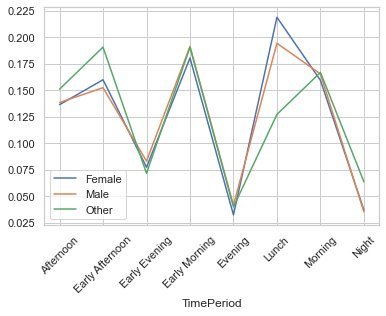

In [38]:
sns.set_theme(style="whitegrid")
sns.lineplot(x=time_dist['Female'].index, y=time_dist['Female'].values,legend='brief',label='Female')
sns.lineplot(x=time_dist['Male'].index, y=time_dist['Male'].values,legend='brief',label='Male')
sns.lineplot(x=time_dist['Other'].index, y=time_dist['Other'].values,legend='brief',label='Other')


plt.xticks(rotation=45)

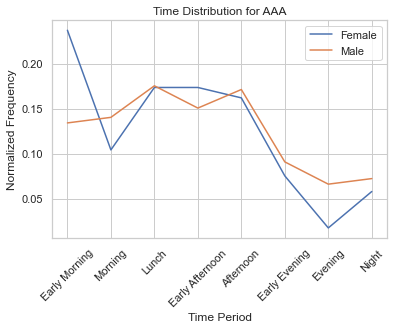

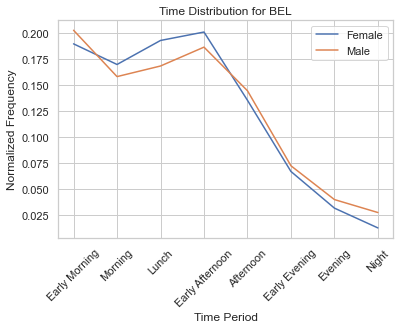

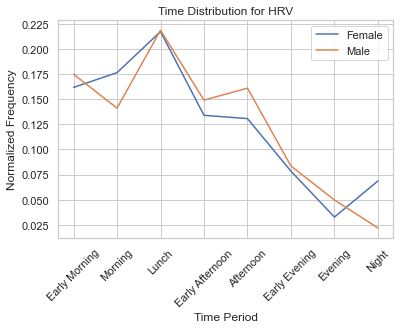

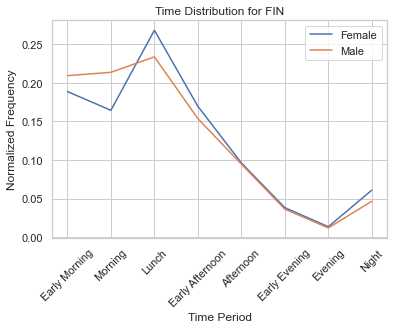

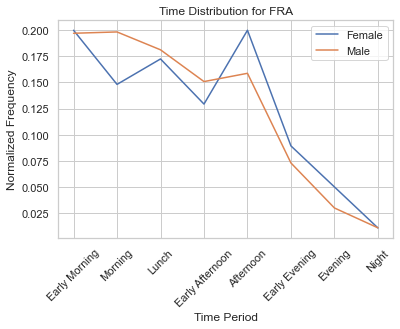

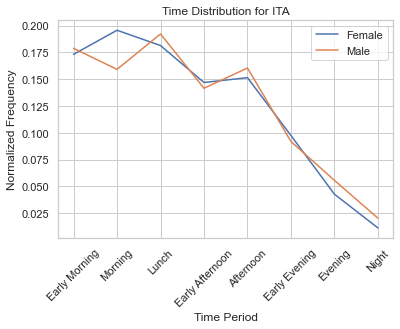

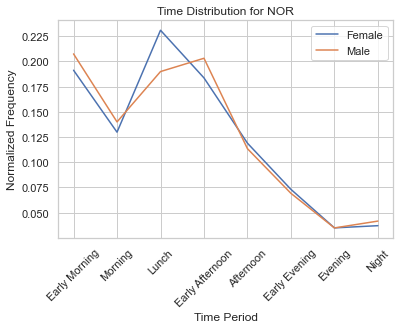

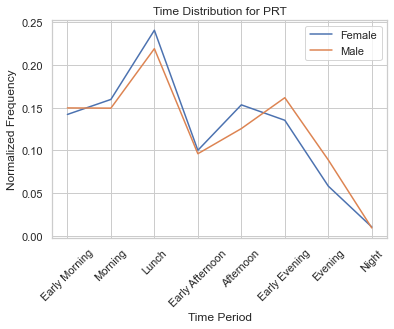

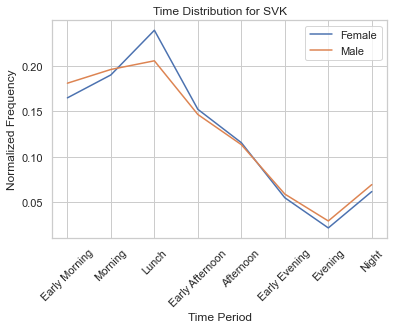

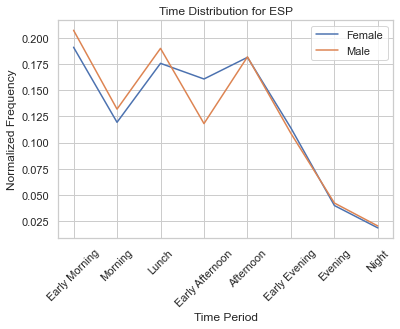

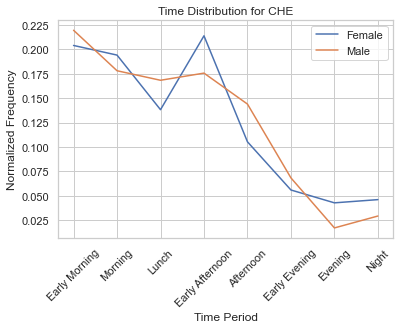

In [39]:
campaigns = legs_df['campaign'].unique()
time_periods_order = ['Early Morning', 'Morning', 'Lunch', 'Early Afternoon', 'Afternoon', 'Early Evening', 'Evening', 'Night']

# Iterate over campaigns
for campaign in campaigns:
    # Filter data for the current campaign
    campaign_data = legs_df[legs_df['campaign'] == campaign]

    # Calculate time distribution
    time_dist = campaign_data.drop_duplicates(subset='tripid').groupby(['gender', 'TimePeriod']).size() / campaign_data.drop_duplicates(subset='tripid').dropna(subset=['TimePeriod']).groupby(['gender']).size()
    time_dist = time_dist.reindex(time_periods_order, level='TimePeriod')
    
    # Plot the graph for the current campaign
    sns.lineplot(x=time_dist['Female'].index, y=time_dist['Female'].values, legend='brief', label='Female')
    sns.lineplot(x=time_dist['Male'].index, y=time_dist['Male'].values, legend='brief', label='Male')
    #sns.lineplot(x=time_dist['Other'].index, y=time_dist['Other'].values, legend='brief', label='Other')
    
    plt.xticks(rotation=45)
    plt.title(f'Time Distribution for {campaign}')
    plt.xlabel('Time Period')
    plt.ylabel('Normalized Frequency')
    plt.legend()
    plt.show()


### Hours of the day: 

In [40]:
#Return relative frequency of time period per each gender
hours_dist = legs_df.drop_duplicates(subset='tripid').groupby(['gender', 'Hour']).size() / legs_df.drop_duplicates(subset='tripid').dropna(subset=['Hour']).groupby('gender').size()
hours_dist 

gender  Hour
Female  00      0.001841
        01      0.000800
        02      0.001761
        03      0.008205
        04      0.023773
                  ...   
Other   19      0.022901
        20      0.015267
        21      0.022901
        22      0.022901
        23      0.015267
Length: 69, dtype: float64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

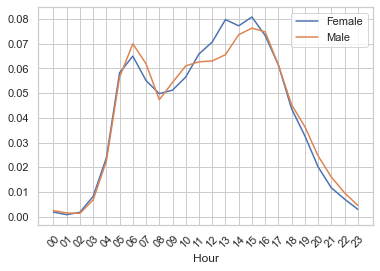

In [41]:
sns.set_theme(style="whitegrid")
sns.lineplot(x=hours_dist['Female'].index, y=hours_dist['Female'].values,legend='brief',label='Female')
sns.lineplot(x=hours_dist['Male'].index, y=hours_dist['Male'].values,legend='brief',label='Male')
#sns.lineplot(x=hours_dist['Other'].index, y=hours_dist['Other'].values,legend='brief',label='Other')


plt.xticks(rotation=45)

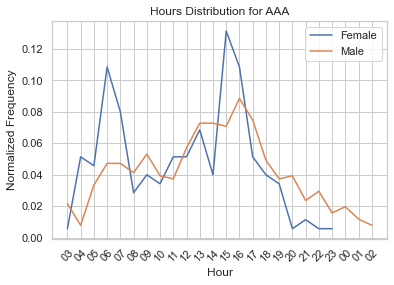

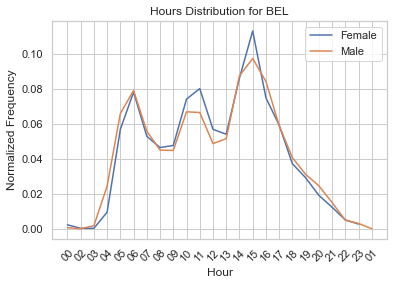

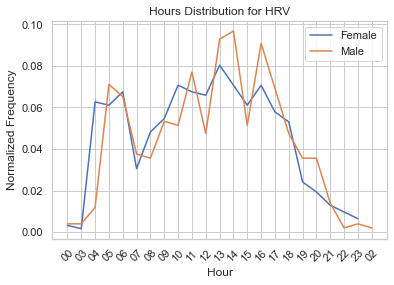

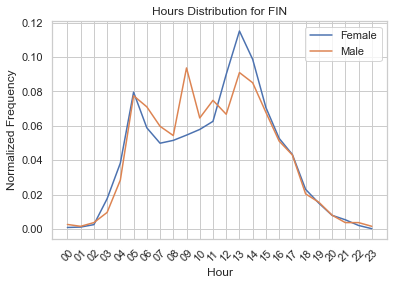

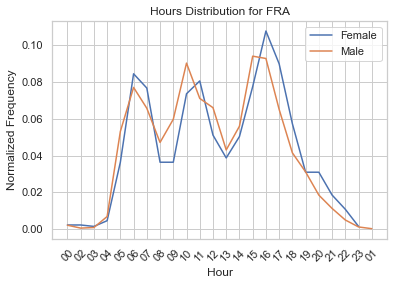

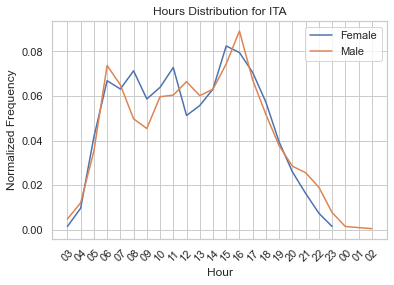

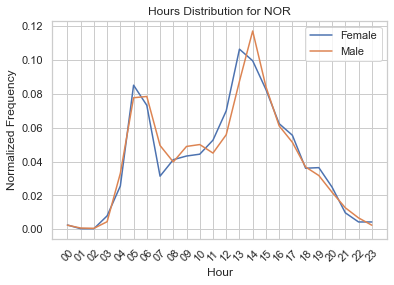

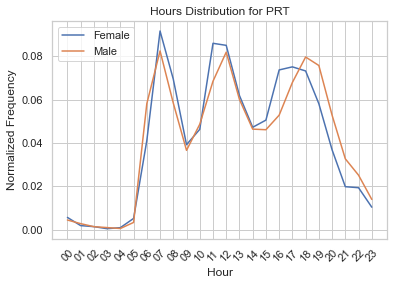

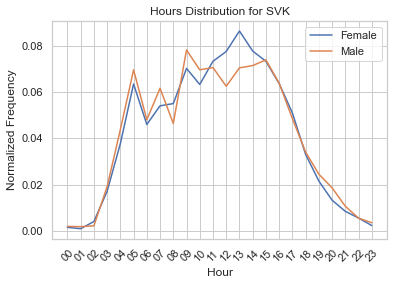

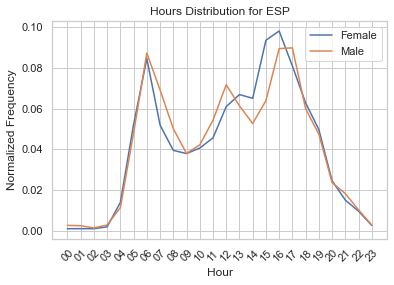

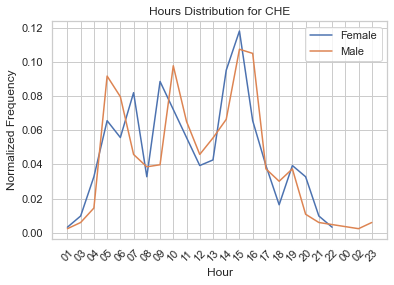

In [42]:
campaigns = legs_df['campaign'].unique()

# Iterate over campaigns
for campaign in campaigns:
    # Filter data for the current campaign
    campaign_data = legs_df[legs_df['campaign'] == campaign]

    # Calculate time distribution
    hours_dist = campaign_data.drop_duplicates(subset='tripid').groupby(['gender', 'Hour']).size() / campaign_data.drop_duplicates(subset='tripid').dropna(subset=['Hour']).groupby(['gender']).size()
    
    # Plot the graph for the current campaign
    sns.lineplot(x=hours_dist['Female'].index, y=hours_dist['Female'].values, legend='brief', label='Female')
    sns.lineplot(x=hours_dist['Male'].index, y=hours_dist['Male'].values, legend='brief', label='Male')
    #sns.lineplot(x=time_dist['Other'].index, y=time_dist['Other'].values, legend='brief', label='Other')
    
    plt.xticks(rotation=45)
    plt.title(f'Hours Distribution for {campaign}')
    plt.xlabel('Hour')
    plt.ylabel('Normalized Frequency')
    plt.legend()
    plt.show()


In [27]:
legs_df.columns

Index(['legid', 'class', 'userid', 'tripid', 'motid', 'start_date', 'end_date',
       'true_distance', 'leg_distance', 'leg_duration',
       'worthwhileness_rating', 'transport_category', 'campaign', 'weekday',
       'weekday_class', 'dateonly', 'start_time', 'time_in_seconds',
       'TimePeriod', 'Hour', 'registration_date', 'gender', 'age_range',
       'lang', 'city', 'country', 'education_level',
       'marital_status_household', 'number_people_household',
       'labour_status_household', 'years_of_residence_household'],
      dtype='object')

In [28]:
df = pd.merge(legs_df, datas['purposes'], on = 'tripid')

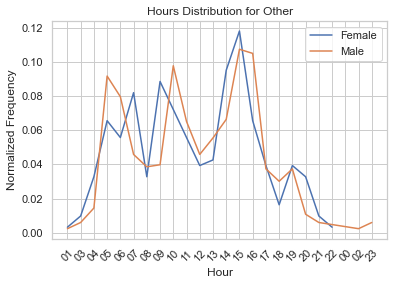

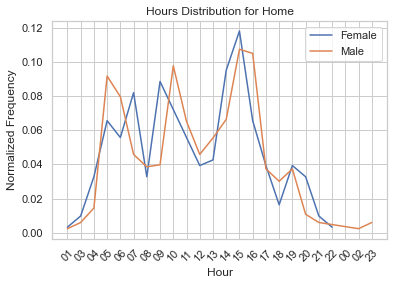

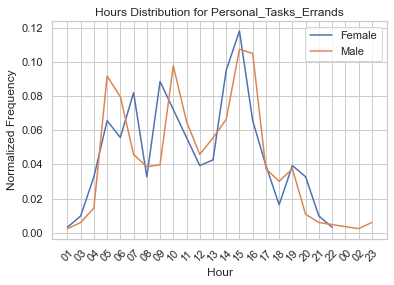

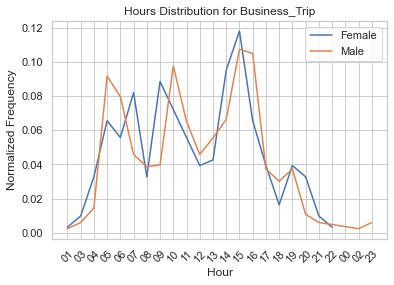

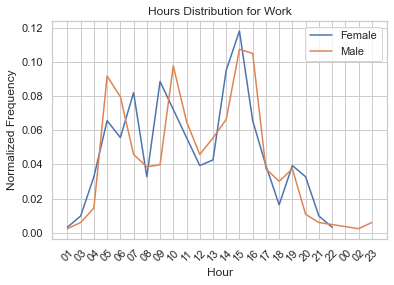

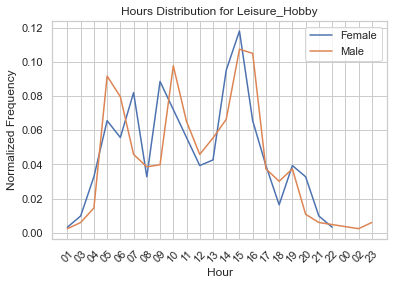

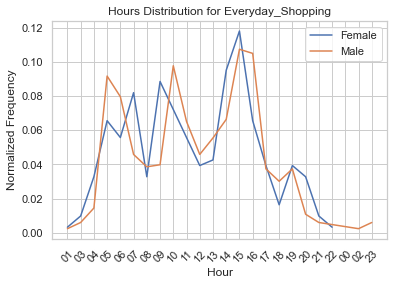

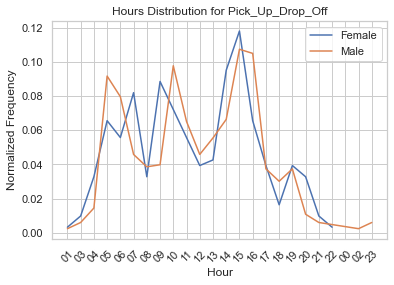

In [43]:
purposes = df['purpose'].unique()

# Iterate over campaigns
for purpose in purposes:
    # Filter data for the current campaign
    purpose_data = df[df['purpose'] == purpose]

    # Calculate time distribution
    hours_dist = campaign_data.drop_duplicates(subset='tripid').groupby(['gender', 'Hour']).size() / campaign_data.drop_duplicates(subset='tripid').dropna(subset=['Hour']).groupby(['gender']).size()
    
    # Plot the graph for the current campaign
    sns.lineplot(x=hours_dist['Female'].index, y=hours_dist['Female'].values, legend='brief', label='Female')
    sns.lineplot(x=hours_dist['Male'].index, y=hours_dist['Male'].values, legend='brief', label='Male')
    #sns.lineplot(x=time_dist['Other'].index, y=time_dist['Other'].values, legend='brief', label='Other')
    
    plt.xticks(rotation=45)
    plt.title(f'Hours Distribution for {purpose}')
    plt.xlabel('Hour')
    plt.ylabel('Normalized Frequency')
    plt.legend()
    plt.show()